In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
tf_result = pd.read_csv('tf_Log/progress.csv')
tf_result.head()

,policy_entropy,eplenmean,eprewmean,policy_loss,value_loss,fps,total_timesteps,time_elapsed,approxkl,serial_timesteps,clipfrac,nupdates,explained_variance
0,1.38488,125.666667,NaN,-0.001048,0.106331,242,1024,4.226129,0.001445,128,0.016846,1,-0.004680
1,1.38181,155.428571,0.714286,-0.001064,0.046059,561,2048,6.051087,0.000813,256,0.039795,2,0.013004
2,1.38156,175.571429,1.214286,-0.000501,0.037005,564,3072,7.866562,0.000572,384,0.019531,3,-0.000792
3,1.38467,180.950000,1.300000,-0.000580,0.030860,568,4096,9.670195,0.000193,512,NaN,4,0.031553
4,1.38546,177.407407,1.259259,-0.000414,0.040690,566,5120,11.479911,0.000185,640,NaN,5,0.074548


In [3]:
torch_result = pd.read_csv('log/progress.csv')
torch_result.head()

,Update_time,policy_loss,policy_entropy,eprewmean,eplenmean,serial_timestep,value_loss,Run_time,num_updates,total_timesteps
0,0.484468,-0.001897,1.38595,NaN,127.500000,128,0.036348,2.540672,1,1024
1,0.383960,-0.002251,1.38156,0.888889,160.777778,256,0.063263,1.304610,2,2048
2,0.362070,-0.000884,1.38155,1.230769,175.384615,384,0.075574,1.289811,3,3072
3,0.361384,-0.000217,1.38075,1.250000,176.750000,512,0.077710,1.343870,4,4096
4,0.361758,-0.000159,1.37747,1.480000,186.040000,640,0.063903,1.319346,5,5120


In [4]:
tf_rew = tf_result['eprewmean'][1:]
tf_num_updates = tf_result['nupdates'][1:]


torch_rew = torch_result['eprewmean'][1:3415]
torch_num_udpates = torch_result['num_updates'][1:3415]

print(len(tf_num_updates))
print(len(tf_rew))

print(len(torch_rew))
print(len(torch_num_udpates))

3414
3414
3414
3414


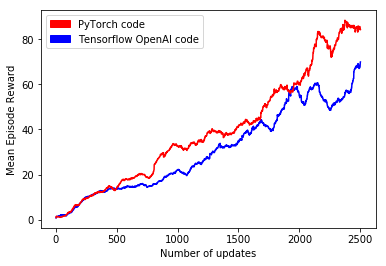

In [5]:
plt.plot(tf_num_updates[:2500], tf_rew[:2500], c='b')
plt.plot(torch_num_udpates[:2500], torch_rew[:2500], c='r')
plt.ylabel('Mean Episode Reward')
plt.xlabel('Number of updates')
red_patch = mpatches.Patch(color='red', label='PyTorch code')
blue_patch = mpatches.Patch(color='blue', label='Tensorflow OpenAI code')
plt.legend(handles=[red_patch, blue_patch])
plt.savefig('imgs/comparison.png')
plt.show()